## Part 1:

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import urllib.request

In [2]:
for i in range(1, 6):
    url = "https://news.ycombinator.com/news?p=" + str(i)
    with urllib.request.urlopen(url) as response:
        html = response.read()
        html = html.decode('utf-8')
    # save the file
    file = "hn" + str(i) + ".html"
    with open(file, 'w') as new_file:
        new_file.write(html)
    

In [3]:
soup = [None] * 5
for i in range(5):
    file = "hn" + str(i+1) + ".html"
    soup[i] = BeautifulSoup(open(file), "html.parser")
    
print(soup[0].prettify())

<html op="news">
 <head>
  <meta content="origin" name="referrer"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="news.css?EfHtUiUs331KRNNSbYDV" rel="stylesheet" type="text/css"/>
  <link href="favicon.ico" rel="shortcut icon"/>
  <link href="rss" rel="alternate" title="RSS" type="application/rss+xml"/>
  <title>
   Hacker News
  </title>
 </head>
 <body>
  <center>
   <table bgcolor="#f6f6ef" border="0" cellpadding="0" cellspacing="0" id="hnmain" width="85%">
    <tr>
     <td bgcolor="#ff6600">
      <table border="0" cellpadding="0" cellspacing="0" style="padding:2px" width="100%">
       <tr>
        <td style="width:18px;padding-right:4px">
         <a href="https://news.ycombinator.com">
          <img height="18" src="y18.gif" style="border:1px white solid;" width="18"/>
         </a>
        </td>
        <td style="line-height:12pt; height:10px;">
         <span class="pagetop">
          <b class="hnname">
           <a href="news">
 

In [4]:
rank = [0] * 150
for i in range(1, 151):
    rank[i-1] = i
rank

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150]

In [5]:
title = [0] * 150
j = 0
for i in range(5):
    for t in soup[i].find_all(class_="storylink"):
        title[j] = len(t.get_text())
        j += 1
title

[41,
 69,
 62,
 34,
 18,
 63,
 21,
 75,
 69,
 74,
 58,
 79,
 76,
 76,
 70,
 55,
 43,
 80,
 18,
 64,
 17,
 37,
 51,
 45,
 64,
 51,
 66,
 80,
 36,
 63,
 37,
 68,
 75,
 41,
 11,
 72,
 32,
 60,
 56,
 51,
 77,
 48,
 76,
 33,
 47,
 30,
 52,
 52,
 39,
 24,
 66,
 32,
 41,
 70,
 70,
 24,
 49,
 37,
 60,
 68,
 68,
 80,
 15,
 33,
 56,
 41,
 65,
 46,
 73,
 33,
 44,
 16,
 46,
 59,
 75,
 80,
 59,
 39,
 63,
 55,
 62,
 61,
 61,
 31,
 53,
 74,
 74,
 42,
 32,
 56,
 50,
 66,
 41,
 31,
 61,
 43,
 65,
 40,
 77,
 78,
 24,
 48,
 60,
 55,
 44,
 62,
 33,
 47,
 71,
 75,
 63,
 62,
 49,
 48,
 67,
 20,
 69,
 52,
 49,
 60,
 48,
 49,
 59,
 33,
 35,
 46,
 45,
 65,
 26,
 62,
 43,
 66,
 56,
 50,
 31,
 64,
 60,
 58,
 43,
 22,
 45,
 64,
 56,
 56,
 80,
 34,
 69,
 55,
 63,
 40]

In [6]:
age = [0] * 150
j = 0
for i in range(5):
    for t in soup[i].find_all(class_="age"):
        text = t.find("a").get_text()
        if "minute" in text:
            age[j] = 0
        elif "day" in text:
            age[j] = int(text.split(" ")[0]) * 24
        else:
            age[j] = int(text.split(" ")[0])
        j += 1
age

[1,
 0,
 0,
 2,
 2,
 4,
 5,
 1,
 0,
 9,
 1,
 1,
 1,
 3,
 2,
 2,
 4,
 9,
 8,
 1,
 2,
 4,
 4,
 6,
 2,
 1,
 9,
 2,
 2,
 9,
 24,
 21,
 13,
 4,
 19,
 7,
 14,
 48,
 17,
 17,
 2,
 3,
 24,
 21,
 17,
 22,
 17,
 21,
 24,
 21,
 18,
 24,
 15,
 24,
 22,
 9,
 24,
 15,
 21,
 24,
 24,
 1,
 24,
 23,
 21,
 12,
 24,
 22,
 18,
 15,
 24,
 24,
 17,
 23,
 24,
 24,
 12,
 20,
 21,
 12,
 24,
 10,
 8,
 48,
 24,
 24,
 48,
 24,
 24,
 21,
 18,
 19,
 24,
 24,
 24,
 17,
 10,
 23,
 24,
 24,
 14,
 22,
 48,
 18,
 11,
 20,
 24,
 48,
 24,
 48,
 22,
 24,
 24,
 24,
 20,
 15,
 24,
 24,
 16,
 24,
 48,
 24,
 24,
 24,
 24,
 24,
 24,
 20,
 48,
 24,
 24,
 24,
 24,
 24,
 24,
 15,
 24,
 24,
 48,
 48,
 24,
 19,
 48,
 24,
 24,
 21,
 17,
 24,
 24,
 24]

In [7]:
points = [0] * 150
j = 0
for i in range(5):
    for t in soup[i].find_all(class_="subtext"):
        if "score" not in str(t):
            points[j] = 0
        else:
            points[j] = int(t.find(class_="score").get_text().split(" ")[0])
        j += 1
points

[88,
 28,
 18,
 188,
 62,
 70,
 95,
 22,
 29,
 146,
 46,
 8,
 130,
 90,
 104,
 55,
 29,
 89,
 67,
 20,
 14,
 14,
 116,
 38,
 142,
 10,
 184,
 48,
 3,
 191,
 867,
 372,
 38,
 131,
 804,
 0,
 249,
 1562,
 132,
 149,
 7,
 61,
 493,
 155,
 227,
 158,
 83,
 135,
 570,
 138,
 96,
 242,
 72,
 184,
 109,
 109,
 185,
 134,
 226,
 112,
 112,
 31,
 202,
 91,
 62,
 38,
 144,
 72,
 44,
 51,
 64,
 156,
 115,
 98,
 225,
 367,
 26,
 326,
 62,
 17,
 299,
 22,
 88,
 320,
 297,
 176,
 438,
 206,
 135,
 76,
 38,
 48,
 185,
 169,
 47,
 175,
 15,
 37,
 141,
 483,
 56,
 106,
 251,
 28,
 53,
 22,
 301,
 31,
 129,
 176,
 6,
 238,
 36,
 111,
 18,
 17,
 154,
 155,
 27,
 23,
 134,
 81,
 14,
 142,
 206,
 122,
 16,
 43,
 179,
 336,
 23,
 97,
 204,
 82,
 234,
 9,
 406,
 129,
 61,
 389,
 21,
 15,
 197,
 65,
 54,
 36,
 14,
 28,
 659,
 123]

In [8]:
comments = [0] * 150
j = 0
for i in range(5):
    for t in soup[i].find_all(class_="subtext"):
        if "comments" not in str(t):
            comments[j] = 0
        else:
            comments[j] = int(t.find_all("a")[3].get_text().replace('\xa0','').split("comments")[0])
        j += 1
comments

[7,
 0,
 5,
 111,
 26,
 12,
 8,
 0,
 12,
 42,
 30,
 0,
 105,
 76,
 98,
 0,
 0,
 8,
 5,
 20,
 0,
 2,
 27,
 68,
 103,
 0,
 182,
 24,
 2,
 95,
 436,
 79,
 11,
 193,
 320,
 0,
 324,
 212,
 34,
 123,
 0,
 117,
 360,
 13,
 206,
 20,
 5,
 23,
 306,
 70,
 20,
 87,
 29,
 75,
 40,
 99,
 67,
 62,
 218,
 29,
 29,
 51,
 55,
 52,
 6,
 6,
 62,
 13,
 6,
 36,
 28,
 22,
 56,
 12,
 44,
 156,
 15,
 331,
 32,
 0,
 213,
 5,
 20,
 100,
 82,
 68,
 354,
 20,
 73,
 65,
 6,
 40,
 135,
 89,
 0,
 135,
 4,
 2,
 37,
 197,
 22,
 52,
 128,
 20,
 92,
 2,
 334,
 0,
 31,
 151,
 0,
 93,
 11,
 15,
 0,
 6,
 65,
 78,
 3,
 27,
 26,
 23,
 0,
 137,
 59,
 31,
 0,
 13,
 66,
 200,
 15,
 20,
 131,
 4,
 58,
 0,
 214,
 77,
 18,
 224,
 0,
 2,
 158,
 13,
 8,
 18,
 5,
 35,
 204,
 77]

In [9]:
import pandas as pd
df = pd.DataFrame({"Rank" : rank, "Title" : title, "Age" : age, "Points" : points, "Comments" : comments})
df = df[['Rank', 'Title', 'Age', 'Points', 'Comments']]
df

,Rank,Title,Age,Points,Comments
0,1,41,1,88,7
1,2,69,0,28,0
2,3,62,0,18,5
3,4,34,2,188,111
4,5,18,2,62,26
5,6,63,4,70,12
6,7,21,5,95,8
7,8,75,1,22,0
8,9,69,0,29,12
9,10,74,9,146,42


In [10]:
df.to_csv("hw3.csv")

## Part 2:

In [11]:
import pandas as pd
df = pd.read_csv("hw3.csv", index_col=0)
df

,Rank,Title,Age,Points,Comments
0,1,41,1,88,7
1,2,69,0,28,0
2,3,62,0,18,5
3,4,34,2,188,111
4,5,18,2,62,26
5,6,63,4,70,12
6,7,21,5,95,8
7,8,75,1,22,0
8,9,69,0,29,12
9,10,74,9,146,42


In [12]:
import statsmodels.api as sm
X = df[['Title', 'Age', 'Points', 'Comments']]
y = df['Rank']
X = sm.add_constant(X)
result = sm.OLS(y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     37.69
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           1.36e-21
Time:                        11:43:26   Log-Likelihood:                -724.60
No. Observations:                 150   AIC:                             1459.
Df Residuals:                     145   BIC:                             1474.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.2492      9.640      3.034      0.003      10.196      48.303
Title          0.0637      0.150      0.424      0.672      -0.233       0.361
Age            2.8946      0.236     12.259      0.000       2.428       3.361
Points        -0.0842      0.021     -4.018      0.000      -0.126      -0.043
Comments       0.0148      0.042      0.354      0.724      -0.068       0.098
==============================================================================
Omnibus:                        6.711   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.859
Skew:                           0.495   Prob(JB):                       0.0324
Kurtosis:                       2.660   Cond. No.                         979.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
X = df[['Age', 'Points', 'Comments']]
y = df['Rank']
X = sm.add_constant(X)
result = sm.OLS(y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     50.48
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           1.91e-22
Time:                        11:43:26   Log-Likelihood:                -724.69
No. Observations:                 150   AIC:                             1457.
Df Residuals:                     146   BIC:                             1469.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.7826      4.825      6.794      0.000      23.246      42.319
Age            2.8869      0.235     12.297      0.000       2.423       3.351
Points        -0.0840      0.021     -4.022      0.000      -0.125      -0.043
Comments       0.0138      0.042      0.331      0.741      -0.069       0.096
==============================================================================
Omnibus:                        6.867   Durbin-Watson:                   0.903
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                7.072
Skew:                           0.507   Prob(JB):                       0.0291
Kurtosis:                       2.680   Cond. No.                         487.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
X = df[['Title', 'Comments']]
y = df['Rank']
X = sm.add_constant(X)
result = sm.OLS(y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                   0.08195
Date:                Thu, 07 Jun 2018   Prob (F-statistic):              0.921
Time:                        11:43:27   Log-Likelihood:                -777.98
No. Observations:                 150   AIC:                             1562.
Df Residuals:                     147   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.1349     12.260      6.536      0.000      55.907     104.363
Title         -0.0771      0.212     -0.363      0.717      -0.497       0.343
Comments      -0.0085      0.041     -0.210      0.834      -0.089       0.072
==============================================================================
Omnibus:                       58.266   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.864
Skew:                          -0.004   Prob(JB):                       0.0119
Kurtosis:                       1.809   Cond. No.                         400.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

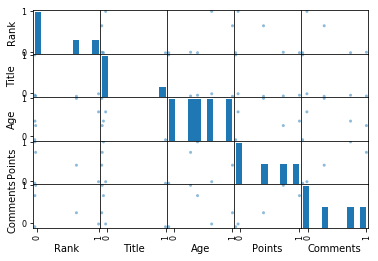

,Rank,Title,Age,Points,Comments
Rank,1.000000,-0.028530,0.643068,-0.026322,-0.014747
Title,-0.028530,1.000000,-0.095570,-0.066589,-0.087653
Age,0.643068,-0.095570,1.000000,0.399102,0.280148
Points,-0.026322,-0.066589,0.399102,1.000000,0.729788
Comments,-0.014747,-0.087653,0.280148,0.729788,1.000000


In [15]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(df[['Rank', 'Title', 'Age', 'Points', 'Comments']].corr())
plt.show()
df[['Rank', 'Title', 'Age', 'Points', 'Comments']].corr()

### Conclusion:
From the above, we can see that rank is proportional to the age so older stories tend to get low rank (bigger rank number). And the rank is inversely proportional to the length of title, total points and number of comments, which means shorter title, higher points and more comments tend to give the story higher rank (smaller rank number).

The second regression model has the best prediction since it has highest R value, and the last model has worst performance because its r value is the lowest among the three models.

As shown above, the correlation scatter and table shows that number of comments has best linear relation to the points.

## Part 3:

In [16]:
for i in range(len(df['Rank'])):
    if df['Rank'][i] > 30:
        df['Rank'][i] = 0
    else:
        df['Rank'][i] = 1
df

,Rank,Title,Age,Points,Comments
0,1,41,1,88,7
1,1,69,0,28,0
2,1,62,0,18,5
3,1,34,2,188,111
4,1,18,2,62,26
5,1,63,4,70,12
6,1,21,5,95,8
7,1,75,1,22,0
8,1,69,0,29,12
9,1,74,9,146,42


In [24]:
import statsmodels.formula.api as sm
import scipy as sc

In [37]:
model = sm.logit(formula="Rank ~ Age", data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.138194
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Rank   No. Observations:                  150
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            1
Date:                Thu, 07 Jun 2018   Pseudo R-squ.:                  0.7238
Time:                        12:11:40   Log-Likelihood:                -20.729
converged:                       True   LL-Null:                       -75.060
                                        LLR p-value:                 1.924e-25
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0848      0.727      4.241      0.000       1.659       4.510
Age           -0.4295      0.087     -4.919      0.000      -0.601      -0.258
==============================================================================
"""

In [39]:
df['pred'] = model.predict()>.5
pd.crosstab(index=df["Rank"], columns=df["pred"])

pred,False,True
Rank,,
0,115,5
1,5,25


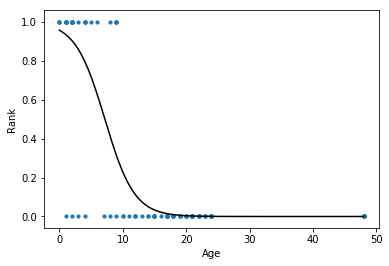

In [34]:
df.plot.scatter(x='Age',y='Rank', s=10)
x = sc.linspace(df['Age'].min(),df['Age'].max(),150)
par = dict(model.params)
logistic = lambda x: 1/(1+sc.exp(-x))
plt.plot(x,logistic(par['Intercept'] + par['Age']*x),color='Black')
plt.show()

In [35]:
model = sm.logit(formula="Rank ~ Points", data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.459635
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Rank   No. Observations:                  150
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            1
Date:                Thu, 07 Jun 2018   Pseudo R-squ.:                 0.08147
Time:                        12:08:12   Log-Likelihood:                -68.945
converged:                       True   LL-Null:                       -75.060
                                        LLR p-value:                 0.0004702
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5454      0.319     -1.707      0.088      -1.171       0.081
Points        -0.0083      0.003     -2.724      0.006      -0.014      -0.002
==============================================================================
"""

In [40]:
df['pred'] = model.predict()>.5
pd.crosstab(index=df["Rank"], columns=df["pred"])

pred,False,True
Rank,,
0,115,5
1,5,25


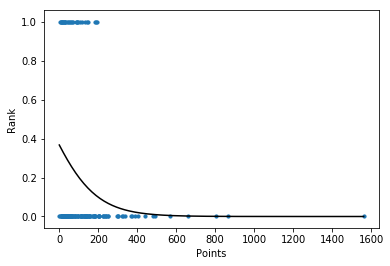

In [36]:
df.plot.scatter(x='Points',y='Rank', s=10)
x = sc.linspace(df['Points'].min(),df['Points'].max(),150)
par = dict(model.params)
logistic = lambda x: 1/(1+sc.exp(-x))
plt.plot(x,logistic(par['Intercept'] + par['Points']*x),color='Black')
plt.show()

In [41]:
model = sm.logit(formula="Rank ~ Age + Points", data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.130944
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Rank   No. Observations:                  150
Model:                          Logit   Df Residuals:                      147
Method:                           MLE   Df Model:                            2
Date:                Thu, 07 Jun 2018   Pseudo R-squ.:                  0.7383
Time:                        12:14:27   Log-Likelihood:                -19.642
converged:                       True   LL-Null:                       -75.060
                                        LLR p-value:                 8.549e-25
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9360      0.727      4.038      0.000       1.511       4.361
Age           -0.4828      0.105     -4.607      0.000      -0.688      -0.277
Points         0.0061      0.003      1.759      0.079      -0.001       0.013
==============================================================================
"""

In [42]:
df['pred'] = model.predict()>.5
pd.crosstab(index=df["Rank"], columns=df["pred"]) # confusion matrix

pred,False,True
Rank,,
0,116,4
1,5,25


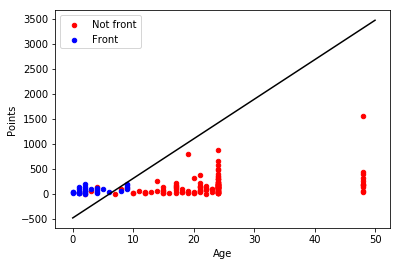

In [53]:
ax = df[df['Rank']==0].plot.scatter(x='Age',y='Points',color='red',label='Not front')
df[df['Rank']==1].plot.scatter(x='Age',y='Points',color='blue',label='Front', ax=ax)

x = sc.linspace(0,50,100)
par = dict(model.params)
p = sc.linspace(1e-5,1-1e-5,1000)
odds = lambda p: p/(1-p)
logit = lambda p: sc.log(odds(p))
plt.plot(x,(1/par['Points'])*(logit(.5) - par['Intercept'] - par['Age']*x),color='Black')

plt.xlabel('Age')
plt.ylabel('Points')
plt.legend(loc='upper left')
plt.show()

### Conclusion:
Lower age and higher points tend to have higher rank (lower rank number), which confirms the part 2's conclusin